<a href="https://colab.research.google.com/github/sabinthapa100/Quantum_Computing/blob/main/QXQ_YLC_Project_BEGINNER_Shor_Code_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Error Correction with the Shor Code**
---

## **Introduction** 
This project extends your work in Week 21 to implement, simulate, and analyze the first ever error correction code proposed that can handle *any* single qubit errors (bit-flips, phase-flips, or others) using the Shor code (Sho95).

<br>

## **Description**
The Shor code is a natural extension of the Bit- and Phase- flip codes that avoid syndrome measurements where:

* A **bit-flip error** means $|0\rangle$ unintentionally turning into $|1\rangle$ or vice versa.
* A **phase-flip error** means $|+\rangle$ unintentionally turning into $|-\rangle$ or vice versa.

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

<br>

## **Key Questions**
In this project, you will answer the following questions:
1. How does using the Shor code compare to using no error correction? Are there any trends you notice?

1. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?

1. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?

<br>

## **Structure**
This project is broken into 3 parts:
> **Part 1**: Defining the Components
>
>> **Part 1.1**: The Phase-Flip Code
>>
>> **Part 1.2**: The Bit-Flip Code
>
> **Part 2**: Implementing the Shor Code
>
> **Part 3**: Analyzing the Shor Code
>
> **Wrapping Up**

<br>

## **Resources**
* [Week 21 Lab Solutions (Bit-Flip Code and Noise Models)](https://drive.google.com/file/d/1nbNfFwUp4eefAR95AG5q_nKSNAMgLmsc/view?usp=share_link)
* [Week 21 Homework Solutions (Phase-Flip Code)](https://colab.research.google.com/drive/1BYZrbBJKTtCCm11Z7No6rNN114fgllhU?usp=sharing)
* [Qiskit's `circuit.compose(...)` function documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html)
* [Qiskit's `Statevector(...)` documentation](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html)
* [Quantum Error Correction for Beginners](https://arxiv.org/pdf/0905.2794.pdf)
* [Scheme for reducing decoherence in quantum computer memory](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.R2493): The original paper from by Shor proposing this code (behind a paywall)

---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [75]:
!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

from random import random
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Libraries Imported Successfully!


## **Part 1: Defining the Components**
---

In this section, we will define the key components of the Shor code through these parts:

**Part 1.1**: The 3-qubit phase-flip code.

**Part 1.2**: The 3-qubit bit-flip code.

---
### **Part 1.1: The Phase-Flip Code**


In this section, we will define two circuits pertaining to the phase-flip code:
1. `phaseflip_encode`: A 3-qubit phase-flip logical to physical encoding.
1. `phaseflip_correct`: A 3-qubit phase-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `phaseflip_encode` circuit that encodes a logical state into a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [76]:
phaseflip_encode = QuantumCircuit(3)

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [77]:
phaseflip_encode.cx(0,1)
phaseflip_encode.cx(0,2)

##### **3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

In [78]:
phaseflip_encode.h(0)
phaseflip_encode.h(1)
phaseflip_encode.h(2)
phaseflip_encode.draw()

┌───┐
q_0: ──■────■──┤ H ├
     ┌─┴─┐  │  ├───┤
q_1: ┤ X ├──┼──┤ H ├
     └───┘┌─┴─┐├───┤
q_2: ─────┤ X ├┤ H ├
          └───┘└───┘

#### **Exercise #2**

Create the `phaseflip_correct` circuit that detects and corrects errors in a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [79]:
phaseflip_correct = QuantumCircuit(3)

##### **2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.**



In [80]:
phaseflip_correct.h(0)
phaseflip_correct.h(1)
phaseflip_correct.h(2)

phaseflip_correct.cx(0,1)
phaseflip_correct.cx(0,2)


phaseflip_correct.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     ├───┤┌─┴─┐  │  
q_1: ┤ H ├┤ X ├──┼──
     ├───┤└───┘┌─┴─┐
q_2: ┤ H ├─────┤ X ├
     └───┘     └───┘

##### **3. Correct any errors using a Toffoli gate.**



In [81]:
phaseflip_correct.ccx(2,1,0)

phaseflip_correct.draw()

┌───┐          ┌───┐
q_0: ┤ H ├──■────■──┤ X ├
     ├───┤┌─┴─┐  │  └─┬─┘
q_1: ┤ H ├┤ X ├──┼────■──
     ├───┤└───┘┌─┴─┐  │  
q_2: ┤ H ├─────┤ X ├──■──
     └───┘     └───┘

#### **Exercise #3**

Simulate the full phase-flip code for the $|+\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Qiskit's `.compose(...)` function allows us to combine different circuits in a number of ways. We will use this throughout the notebook to build up a full Shor code, but since this is the first time you are seeing it we have provided it for you.

Ref: https://youtu.be/3ja8uCqUS0s

**Run the code below to compose the encoding and correcting circuits.**

In [82]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐          ┌───┐ ░  ░ ┌───┐          ┌───┐
q_0: ┤ H ├──■────■──┤ H ├─░──░─┤ H ├──■────■──┤ X ├
     └───┘┌─┴─┐  │  ├───┤ ░  ░ ├───┤┌─┴─┐  │  └─┬─┘
q_1: ─────┤ X ├──┼──┤ H ├─░──░─┤ H ├┤ X ├──┼────■──
          └───┘┌─┴─┐├───┤ ░  ░ ├───┤└───┘┌─┴─┐  │  
q_2: ──────────┤ X ├┤ H ├─░──░─┤ H ├─────┤ X ├──■──
               └───┘└───┘ ░  ░ └───┘     └───┘     
c: 1/══════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [83]:
initial_state.equiv(final_state)

True

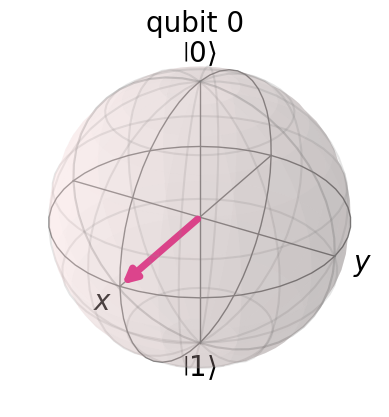

In [84]:
initial_state.draw(output = 'bloch')

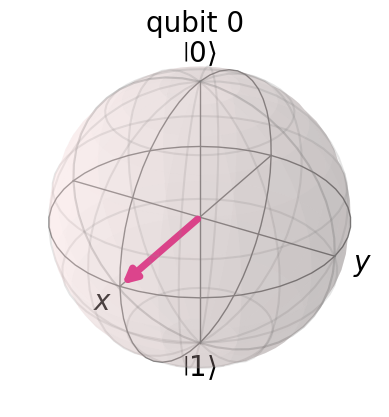

In [85]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full phase-flip code for the $|-\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

In [86]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state |-> and save its statevector
full_code.x(0)
full_code.h(0)


initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐┌───┐          ┌───┐ ░  ░ ┌───┐          ┌───┐
q_0: ┤ X ├┤ H ├──■────■──┤ H ├─░──░─┤ H ├──■────■──┤ X ├
     └───┘└───┘┌─┴─┐  │  ├───┤ ░  ░ ├───┤┌─┴─┐  │  └─┬─┘
q_1: ──────────┤ X ├──┼──┤ H ├─░──░─┤ H ├┤ X ├──┼────■──
               └───┘┌─┴─┐├───┤ ░  ░ ├───┤└───┘┌─┴─┐  │  
q_2: ───────────────┤ X ├┤ H ├─░──░─┤ H ├─────┤ X ├──■──
                    └───┘└───┘ ░  ░ └───┘     └───┘     
c: 1/═══════════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [87]:
initial_state.equiv(final_state)

True

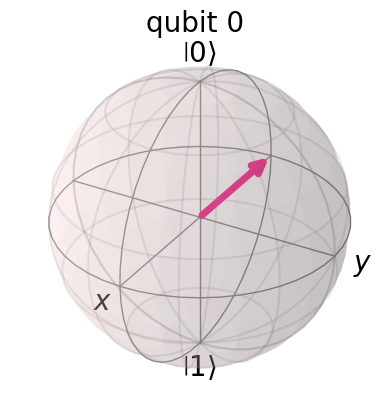

In [88]:
initial_state.draw(output = 'bloch')

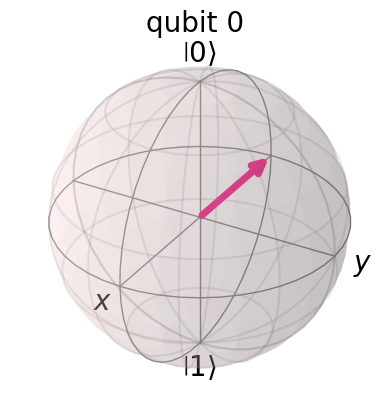

In [89]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full phase-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

In [90]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐┌───┐          ┌───┐ ░ ┌───┐ ░ ┌───┐          ┌───┐
q_0: ┤ X ├┤ H ├──■────■──┤ H ├─░─┤ Z ├─░─┤ H ├──■────■──┤ X ├
     └───┘└───┘┌─┴─┐  │  ├───┤ ░ └───┘ ░ ├───┤┌─┴─┐  │  └─┬─┘
q_1: ──────────┤ X ├──┼──┤ H ├─░───────░─┤ H ├┤ X ├──┼────■──
               └───┘┌─┴─┐├───┤ ░       ░ ├───┤└───┘┌─┴─┐  │  
q_2: ───────────────┤ X ├┤ H ├─░───────░─┤ H ├─────┤ X ├──■──
                    └───┘└───┘ ░       ░ └───┘     └───┘     
c: 1/════════════════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [91]:
initial_state.equiv(final_state)

True

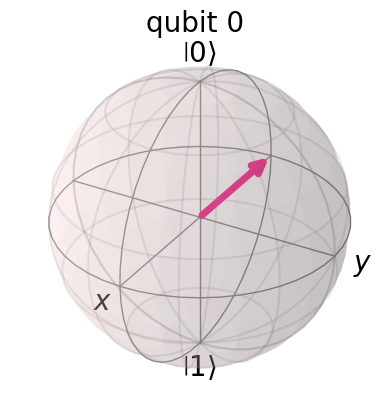

In [92]:
initial_state.draw(output = 'bloch')

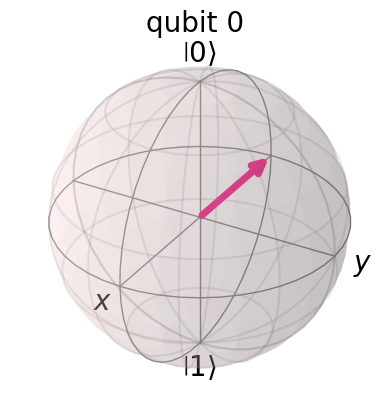

In [93]:
final_state.draw(output = 'bloch')

#### **Exercise #6**

Simulate the full phase-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.


My Reference: https://quantumcomputinguk.org/tutorials/quantum-error-correction-bit-flip-code-in-qiskit#:~:text=What%20is%20a%20Bit%20Flip,qubits%20to%20correct%201%20qubit.


##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

In [94]:
bitflip_encode = QuantumCircuit(3)
bitflip_encode.cx(0,1)
bitflip_encode.cx(0,2)

bitflip_correct = QuantumCircuit(3)
bitflip_correct.cx(0,1)
bitflip_correct.cx(0,2)

bitflip_correct.ccx(2,1,0)


full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
full_code.x(0)
#bit-flip on qubit 0

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐┌───┐           ░ ┌───┐ ░           ┌───┐
q_0: ┤ X ├┤ H ├──■────■───░─┤ X ├─░───■────■──┤ X ├
     └───┘└───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘
q_1: ──────────┤ X ├──┼───░───────░─┤ X ├──┼────■──
               └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │  
q_2: ───────────────┤ X ├─░───────░──────┤ X ├──■──
                    └───┘ ░       ░      └───┘     
c: 1/══════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [95]:
initial_state.equiv(final_state)

True

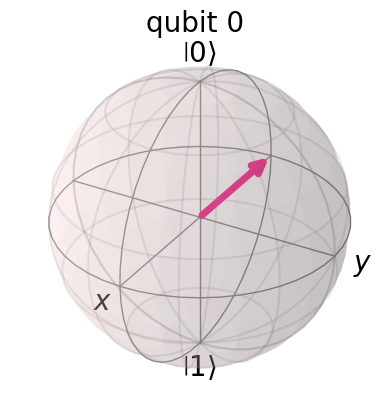

In [96]:
initial_state.draw(output = 'bloch')

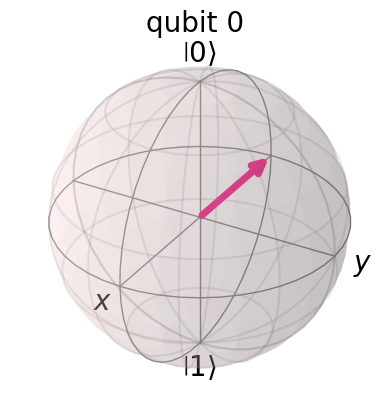

In [97]:
final_state.draw(output = 'bloch')

---
### **Part 1.2: The Bit-Flip Code**


In this section, we will define two circuits pertaining to the bit-flip code:
1. `bitflip_encode`: A 3-qubit bit-flip logical to physical encoding.
1. `bitflip_correct`: A 3-qubit bit-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `bitflip_encode` circuit that encodes a logical state into a 3-qubit bitflip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [98]:
bitflip_encode = QuantumCircuit(3)

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [99]:
bitflip_encode.cx(0,1)
bitflip_encode.cx(0,2)

#### **Exercise #2**

Create the `bitflip_correct` circuit that detects and corrects errors in a 3-qubit bit-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [100]:
bitflip_correct = QuantumCircuit(3)

##### **2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.**



In [101]:
bitflip_correct = QuantumCircuit(3)
bitflip_correct.cx(0,1)
bitflip_correct.cx(0,2)
bitflip_correct.draw()

q_0: ──■────■──
     ┌─┴─┐  │  
q_1: ┤ X ├──┼──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘

##### **3. Correct any errors using a Toffoli gate.**



In [102]:
bitflip_correct.ccx(2,1,0)

bitflip_correct.draw()

┌───┐
q_0: ──■────■──┤ X ├
     ┌─┴─┐  │  └─┬─┘
q_1: ┤ X ├──┼────■──
     └───┘┌─┴─┐  │  
q_2: ─────┤ X ├──■──
          └───┘

#### **Exercise #3**

Simulate the full bit-flip code for the $|0\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Adapt this step from the phase-flip code developed in Part 1.1 for the bit-flip code we have developed just above. 

**NOTE**: This is almost entirely just a changle of variable names.

In [103]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# state is in |0> and save its statevector

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

░  ░           ┌───┐
q_0: ──■────■───░──░───■────■──┤ X ├
     ┌─┴─┐  │   ░  ░ ┌─┴─┐  │  └─┬─┘
q_1: ┤ X ├──┼───░──░─┤ X ├──┼────■──
     └───┘┌─┴─┐ ░  ░ └───┘┌─┴─┐  │  
q_2: ─────┤ X ├─░──░──────┤ X ├──■──
          └───┘ ░  ░      └───┘     
c: 1/═══════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [104]:
initial_state.equiv(final_state)

True

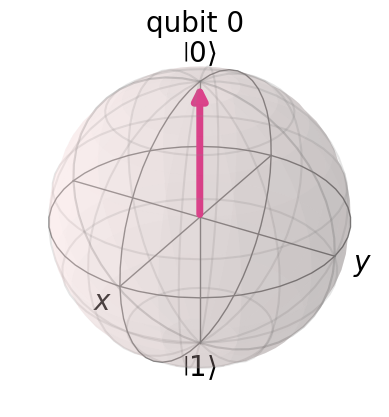

In [105]:
initial_state.draw(output = 'bloch')

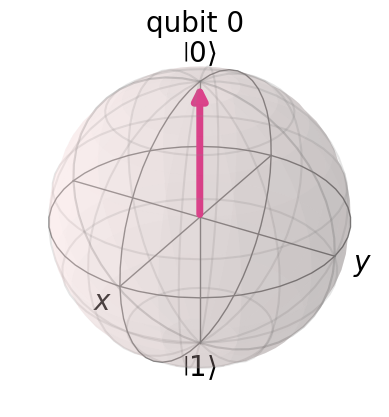

In [106]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full bit-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

In [107]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0) #bitflip on 0th qubit

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐┌───┐           ░ ┌───┐ ░           ┌───┐
q_0: ┤ X ├┤ H ├──■────■───░─┤ X ├─░───■────■──┤ X ├
     └───┘└───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘
q_1: ──────────┤ X ├──┼───░───────░─┤ X ├──┼────■──
               └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │  
q_2: ───────────────┤ X ├─░───────░──────┤ X ├──■──
                    └───┘ ░       ░      └───┘     
c: 1/══════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [108]:
initial_state.equiv(final_state)

True

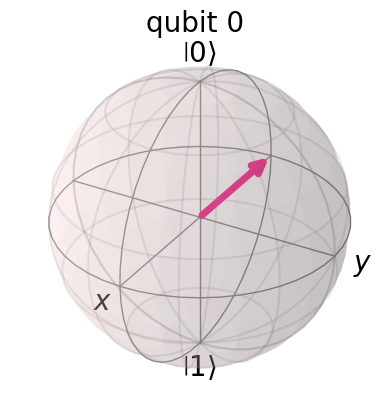

In [109]:
initial_state.draw(output = 'bloch')

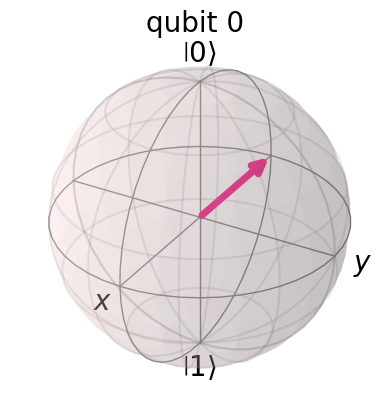

In [110]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full bit-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

In [111]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state |-> and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.z(0) #phase-flip on 0th qubit

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2]).to_statevector()

full_code.draw()

┌───┐┌───┐           ░ ┌───┐ ░           ┌───┐
q_0: ┤ X ├┤ H ├──■────■───░─┤ Z ├─░───■────■──┤ X ├
     └───┘└───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘
q_1: ──────────┤ X ├──┼───░───────░─┤ X ├──┼────■──
               └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │  
q_2: ───────────────┤ X ├─░───────░──────┤ X ├──■──
                    └───┘ ░       ░      └───┘     
c: 1/══════════════════════════════════════════════

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [112]:
initial_state.equiv(final_state)

False

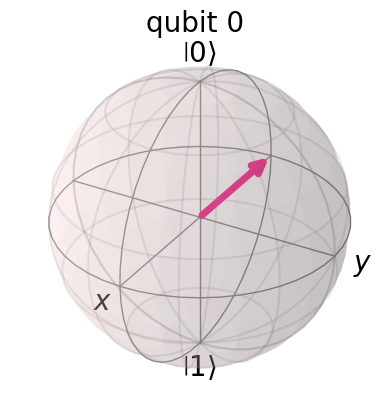

In [113]:
initial_state.draw(output = 'bloch')

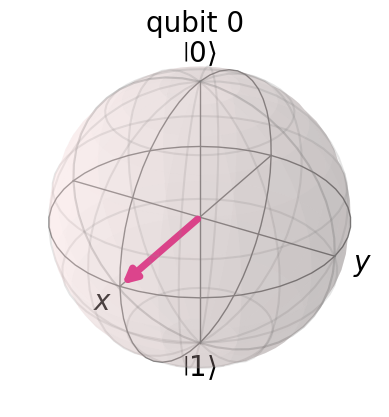

In [114]:
final_state.draw(output = 'bloch')

## **Part 2: Implementing the Shor Code**
---

In this section, we will build on the work from the last section to implement Shor's code in full.

## **Part 2: Implementing the Shor Code**
---

In this section, we will build on the work from the last section to implement Shor's code in full.

In [115]:
#Reference: https://quantumcomputinguk.org/tutorials/quantum-error-correction-shor-code-in-qiskit


### **Exercise #1**

Initialize a circuit with the correct number of qubits. It is up to you to determine the correct number based on the description of the code below and any other resources at your disposal.

<br>

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

In [116]:
shor_encode = QuantumCircuit(9) 

#we need 9 qubits (physical), where first qubit q0 is the logical qubit 
#and other 8 qubits are ancillary qubits

### **Exercise #2**

Complete the code below using every 3rd qubit for the phase-flip code.





In [117]:
# encode every 3rd qubit into a 3-qubit phase-flip code
shor_encode = shor_encode.compose(phaseflip_encode, qubits=[0,3,6])

#using the above sketch, extending it from q0 to q8, we can see
#q0, q3, q6 are used in phase flip coding: encoding and correction

### **Exercise #3**

Complete the code below to encode each of the phase-flip code qubits using their own bit-flip code.

In [118]:
# encode each of the phase-flip code qubits using their own bit-flip code
shor_encode = shor_encode.compose(bitflip_encode, qubits = [0,1,2])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [3,4,5])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [6,7,8])


#using the above referenced figure, extending it from q0 to q8, we can see
#q0, q3, q8 are used in phase flip coding, while
# all the qubits (in this arrangement: [q0,q1,q2],[q3,q4,q5],[q6,q7,q8]) are involved in bit flip coding

### **Exercise #4**

Now, initialize the correcting circuit with the correct number of qubits.

In [119]:
shor_correct = QuantumCircuit(9)
#we need 9 qubits (physical), where first qubit q0 is the logical qubit 
#and other 8 qubits are ancillary qubits

### **Exercise #5**

For the same qubits that you encoded in Exercise #3, correct any bit-flips.

In [120]:
shor_correct = shor_correct.compose(bitflip_correct, qubits = [0,1,2])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [3,4,5])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [6,7,8])

#using the above referenced figure, extending it from q0 to q8, we can see
#q0, q3, q8 are used in phase flip coding, while
# all the qubits (in this arrangement: [q0,q1,q2],[q3,q4,q5],[q6,q7,q8]) are involved in bit flip coding -encoding and correction!

### **Exercise #6**

For the same qubits that you encoded in Exercise #2, correct any phase-flips.

In [121]:
shor_correct = shor_correct.compose(phaseflip_correct, qubits=[0,3,6])

### **Exercise #7**

**Verify your implementation is correct by running the code below.**

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

[Click here for reference 1!](https://medium.com/arnaldo-gunzi-quantum/how-to-use-the-compose-function-in-qiskit-5983bf4fffcf#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImFjZGEzNjBmYjM2Y2QxNWZmODNhZjgzZTE3M2Y0N2ZmYzM2ZDExMWMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2ODA2ODM3MDIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzUwMzAzNDY0NDM4MDQ5OTY5MCIsImVtYWlsIjoic2FiaW50aGFwYTI0MEBnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlNhYmluIFRoYXBhIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FHTm15eGFoalo2aFY3Q2NBeFdXVGpNZlh4UFhwSTdUU09ZN1l6TXE2V3lWUWc9czk2LWMiLCJnaXZlbl9uYW1lIjoiU2FiaW4iLCJmYW1pbHlfbmFtZSI6IlRoYXBhIiwiaWF0IjoxNjgwNjg0MDAyLCJleHAiOjE2ODA2ODc2MDIsImp0aSI6IjA5YjE5ZDlhYTQ1ZmE4OWQ4NTM2ZDZlNTNmMTM3NDZlZjU3Y2JmMDEifQ.rZdeAQnQN7k1b2QVVgL21pqGzu08zLZNHz-vLVT3YMjbreHk8oSCsNWfqtlmDYLsWvzIBRp_4lu_q1jjwrM10TL6h3_xOXlLshZz2VujoTxN0l8J6vMxKMLS4C3otXWXk3BLt0d5wCFaKnINRFvTkR-gMM7f4eq8hb4KeEzkOmlAh6DT2RNH9D12c5Z6nz8rHYathpNLc5YxjyFvHRYxsz8ruK3D71RSeYjXSnKtOsAp-fzxXW71t7JJFUw_QhRYcIYe8HElAO-DwwoKeFlHeb6vYwA7-0PpVMn-AW76OLkLJrirMHgZLmcsbZZtf0RtrqfFA_YmTgFDo5dGC1rWdA)

[Click here for reference 2!](https://quantumcomputinguk.org/tutorials/quantum-error-correction-shor-code-in-qiskit)



In [122]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

┌───┐           ░ ┌───┐┌───┐ ░           ┌───┐┌───┐          »
q_0: ──■────■──┤ H ├──■────■───░─┤ X ├┤ Z ├─░───■────■──┤ X ├┤ H ├──■────■──»
       │    │  └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘  │    │  »
q_1: ──┼────┼───────┤ X ├──┼───░────────────░─┤ X ├──┼────■─────────┼────┼──»
       │    │       └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐  │         │    │  »
q_2: ──┼────┼────────────┤ X ├─░────────────░──────┤ X ├──■─────────┼────┼──»
     ┌─┴─┐  │  ┌───┐     └───┘ ░            ░      └───┘┌───┐┌───┐┌─┴─┐  │  »
q_3: ┤ X ├──┼──┤ H ├──■────■───░────────────░───■────■──┤ X ├┤ H ├┤ X ├──┼──»
     └───┘  │  └───┘┌─┴─┐  │   ░            ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘  │  »
q_4: ───────┼───────┤ X ├──┼───░────────────░─┤ X ├──┼────■──────────────┼──»
            │       └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐  │              │  »
q_5: ───────┼────────────┤ X ├─░────────────░──────┤ X ├──■──────────────┼──»
          ┌─┴─┐┌───┐     └───┘ ░            ░      └───┘┌───┐┌───┐     ┌─┴─┐»
q_6: ─────┤ X ├┤ H ├──■────■───░────────────░───■────■──┤ X ├┤ H ├─────┤ X ├»
          └───┘└───┘┌─┴─┐  │   ░            ░ ┌─┴─┐  │  └─┬─┘└───┘     └───┘»
q_7: ───────────────┤ X ├──┼───░────────────░─┤ X ├──┼────■─────────────────»
                    └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐  │                 »
q_8: ────────────────────┤ X ├─░────────────░──────┤ X ├──■─────────────────»
                         └───┘ ░            ░      └───┘                    »
«     ┌───┐
«q_0: ┤ X ├
«     └─┬─┘
«q_1: ──┼──
«       │  
«q_2: ──┼──
«       │  
«q_3: ──■──
«       │  
«q_4: ──┼──
«       │  
«q_5: ──┼──
«       │  
«q_6: ──■──
«          
«q_7: ─────
«          
«q_8: ─────
«

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [123]:
initial_state.equiv(final_state)

True

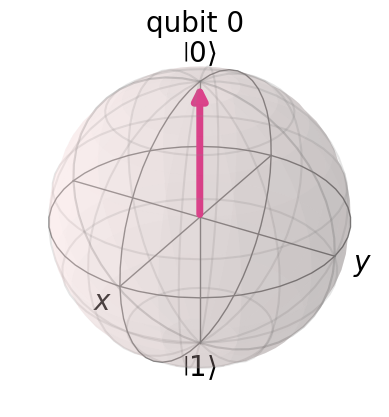

In [124]:
initial_state.draw(output = 'bloch')

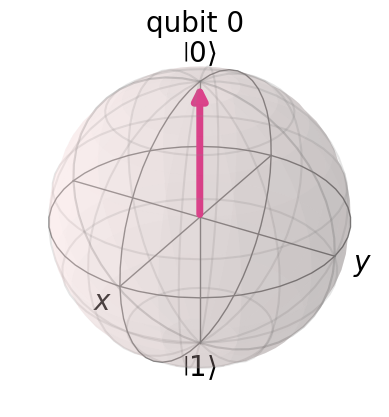

In [125]:
final_state.draw(output = 'bloch')

### **Exercise #8**

By only adjusting the qiskit code in the ERRORS section, determine a way to break this error correcting code (there are many solutions). For reference, there are actually 2 valid ways to break this code: 
1. The qiskit code runs, but the initial and final states do not match.
2. The qiskit code itself doesn't run and gives the following output: ```QiskitError: 'Density matrix is not a pure state'```. 



**NOTE**: If you're curious, the second error is a sign of a change in the quantum state so serious that the qiskit function for creating the statevector effectively fails. In quantum physics, this particular change is called going from a "pure state" to a "mixed state".

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

In [208]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.h(0)
full_code.ccx(0,3,6) #this caused "mixed state"

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

QiskitError: ignored

In [243]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.ry(math.pi/5,0)
full_code.ry(math.pi/15,4)
full_code.ry(math.pi/15,6)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

QiskitError: ignored

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [242]:
initial_state.equiv(final_state)

False

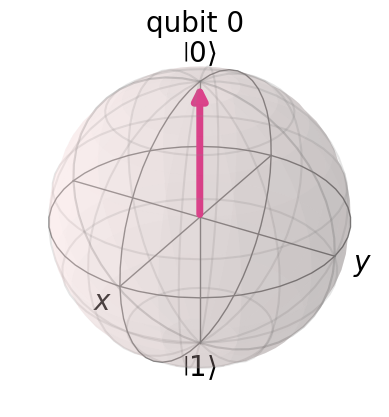

In [240]:
initial_state.draw(output = 'bloch')

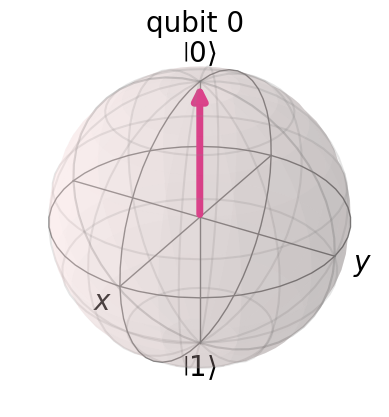

In [231]:
final_state.draw(output = 'bloch')

### **Exercise #9**

Simulate the Shor code for bit and phase-flip errors that occur 10% of the time.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

The code below introduces bit and phase-flip errors 50% of the time. Change the necesssary line(s) so that these errors only occur 10% of the time.

In [130]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < 0.10:
    full_code.x(i)
  if random() < 0.10:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

┌───┐           ░       ░           ┌───┐┌───┐          ┌───┐
q_0: ──■────■──┤ H ├──■────■───░───────░───■────■──┤ X ├┤ H ├──■────■──┤ X ├
       │    │  └───┘┌─┴─┐  │   ░       ░ ┌─┴─┐  │  └─┬─┘└───┘  │    │  └─┬─┘
q_1: ──┼────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■─────────┼────┼────┼──
       │    │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │         │    │    │  
q_2: ──┼────┼────────────┤ X ├─░───────░──────┤ X ├──■─────────┼────┼────┼──
     ┌─┴─┐  │  ┌───┐     └───┘ ░ ┌───┐ ░      └───┘┌───┐┌───┐┌─┴─┐  │    │  
q_3: ┤ X ├──┼──┤ H ├──■────■───░─┤ Z ├─░───■────■──┤ X ├┤ H ├┤ X ├──┼────■──
     └───┘  │  └───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘  │    │  
q_4: ───────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■──────────────┼────┼──
            │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │              │    │  
q_5: ───────┼────────────┤ X ├─░───────░──────┤ X ├──■──────────────┼────┼──
          ┌─┴─┐┌───┐     └───┘ ░ ┌───┐ ░      └───┘┌───┐┌───┐     ┌─┴─┐  │  
q_6: ─────┤ X ├┤ H ├──■────■───░─┤ X ├─░───■────■──┤ X ├┤ H ├─────┤ X ├──■──
          └───┘└───┘┌─┴─┐  │   ░ ├───┤ ░ ┌─┴─┐  │  └─┬─┘└───┘     └───┘     
q_7: ───────────────┤ X ├──┼───░─┤ Z ├─░─┤ X ├──┼────■──────────────────────
                    └───┘┌─┴─┐ ░ └───┘ ░ └───┘┌─┴─┐  │                      
q_8: ────────────────────┤ X ├─░───────░──────┤ X ├──■──────────────────────
                         └───┘ ░       ░      └───┘

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [131]:
initial_state.equiv(final_state)

False

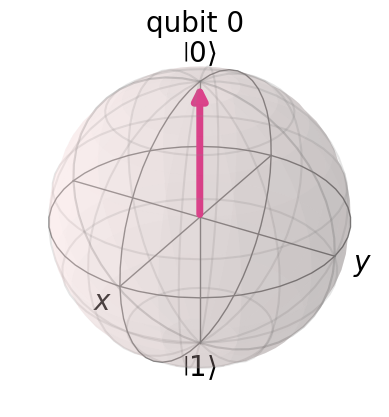

In [132]:
initial_state.draw(output = 'bloch')

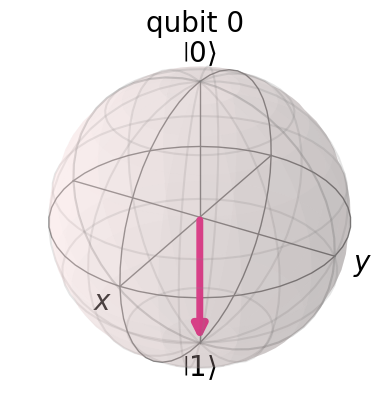

In [133]:
final_state.draw(output = 'bloch')

### **Exercise #10**

Adjust the code from Exercise #9 to use the variable provided for the probability of an error instead of hardcoding it in.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**



In [155]:
probability = 0.10

full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

┌───┐           ░ ┌───┐      ░           ┌───┐┌───┐          »
q_0: ──■────■──┤ H ├──■────■───░─┤ Z ├──────░───■────■──┤ X ├┤ H ├──■────■──»
       │    │  └───┘┌─┴─┐  │   ░ └───┘      ░ ┌─┴─┐  │  └─┬─┘└───┘  │    │  »
q_1: ──┼────┼───────┤ X ├──┼───░────────────░─┤ X ├──┼────■─────────┼────┼──»
       │    │       └───┘┌─┴─┐ ░ ┌───┐┌───┐ ░ └───┘┌─┴─┐  │         │    │  »
q_2: ──┼────┼────────────┤ X ├─░─┤ X ├┤ Z ├─░──────┤ X ├──■─────────┼────┼──»
     ┌─┴─┐  │  ┌───┐     └───┘ ░ └───┘└───┘ ░      └───┘┌───┐┌───┐┌─┴─┐  │  »
q_3: ┤ X ├──┼──┤ H ├──■────■───░────────────░───■────■──┤ X ├┤ H ├┤ X ├──┼──»
     └───┘  │  └───┘┌─┴─┐  │   ░            ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘  │  »
q_4: ───────┼───────┤ X ├──┼───░────────────░─┤ X ├──┼────■──────────────┼──»
            │       └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐  │              │  »
q_5: ───────┼────────────┤ X ├─░────────────░──────┤ X ├──■──────────────┼──»
          ┌─┴─┐┌───┐     └───┘ ░            ░      └───┘┌───┐┌───┐     ┌─┴─┐»
q_6: ─────┤ X ├┤ H ├──■────■───░────────────░───■────■──┤ X ├┤ H ├─────┤ X ├»
          └───┘└───┘┌─┴─┐  │   ░            ░ ┌─┴─┐  │  └─┬─┘└───┘     └───┘»
q_7: ───────────────┤ X ├──┼───░────────────░─┤ X ├──┼────■─────────────────»
                    └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐  │                 »
q_8: ────────────────────┤ X ├─░────────────░──────┤ X ├──■─────────────────»
                         └───┘ ░            ░      └───┘                    »
«     ┌───┐
«q_0: ┤ X ├
«     └─┬─┘
«q_1: ──┼──
«       │  
«q_2: ──┼──
«       │  
«q_3: ──■──
«       │  
«q_4: ──┼──
«       │  
«q_5: ──┼──
«       │  
«q_6: ──■──
«          
«q_7: ─────
«          
«q_8: ─────
«

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [156]:
initial_state.equiv(final_state)

True

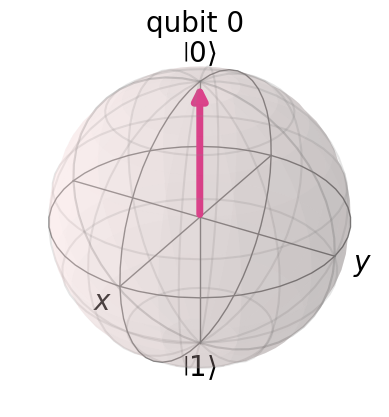

In [157]:
initial_state.draw(output = 'bloch')

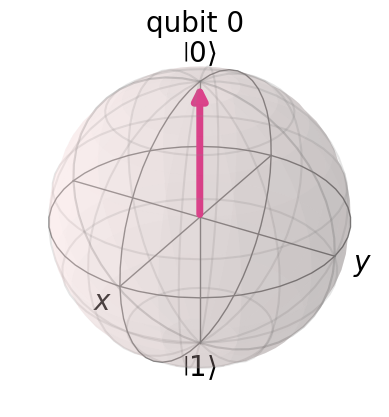

In [158]:
final_state.draw(output = 'bloch')

## **Part 3: Analzying the Shor Code**
---

In this section, we will learn how to analyze error correction simulations using a very important measurement in quantum physics: **state fidelity**. This measures how close two quantum states are to each other on a scale of 0 (completely different) to 1 (the same).

**Run the code below to calculate the fidelity between two qubits that are both in the $|0\rangle$ state (represented in vector notation).**

In [159]:
state_fidelity([1, 0], [1, 0])

1.0

### **Exercise #1**

Calculate the state fidelity between the $|0\rangle$ and $|1\rangle$ states.

In [160]:
state_fidelity([1,0],[0,1])

0.0

### **Exercise #2**

Calculate the state fidelity between the $|1\rangle$ and $|0\rangle$ states to determine if the order of states matters.

In [161]:
state_fidelity([0,1],[1,0])

0.0

### **Exercise #3**

Calculate the state fidelity between the $|0\rangle$ and $|+\rangle$ states.

**NOTE**: You may need to consult lessons from earlier in the year or other resources to determine the vector representation of the $|+\rangle state.

In [162]:
state_fidelity([1,0],[1/math.sqrt(2),1/math.sqrt(2)])

0.4999999999999999

### **Exercise #4**

Calculate the state fidelity between the $|0\rangle$ and $|-\rangle$ states.

In [163]:
state_fidelity([1,0],[1/math.sqrt(2),-1/math.sqrt(2)])

0.4999999999999999

### **Exercise #5**

Complete the code below to calculate the state fidelity between the $|1\rangle$ and $|-\rangle$ states.

In [164]:
qc = QuantumCircuit(1)
qc.x(0)
initial_state = Statevector.from_instruction(qc)

qc.h(0)
final_state = Statevector.from_instruction(qc)

state_fidelity(initial_state, final_state)

0.4999999999999999

### **Exercise #6**

Write code to calculate the state fidelity between the $|00\rangle$ and $|\beta_{00}\rangle = \frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$ states.

In [165]:
qc = QuantumCircuit(2)
initial_state = Statevector.from_instruction(qc)

qc.h(0)
qc.cx(0,1)
final_state = Statevector.from_instruction(qc)


state_fidelity(initial_state, final_state)

0.4999999999999999

### **Exercise #7**

Write code to calculate the state fidelity between the initial and final states from Exercise #7 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: Given that these states are from before and after using an error correction scheme, do we want the state fidelity to be 0, 1, or something in between?

**Answer**: If this error correction scheme doesnot break, then the state fidelity will be 1 as the final state is same as the initial state (preserved); as it measures the closeness of those two states (1 if same, but 0 if completely different, like a |0> qubit after applying X-gate becomes |1> and vice-versa with the state fidelity becoming zero).
Otherwise, it should be something in between 0 and 1 (I believe: as the initial and final states are not same but are related (only when the final is linear superposition(allowed) of the initial and other states.).

In [166]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()



state_fidelity(initial_state, final_state)

1.0

### **Exercise #8**

Write code to calculate the state fidelity between the initial and final states from Exercise #10 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: If the probability is increased, what tends to happen to the fidelity? Test this out by altering your solution below as needed.
**Answer**: As the probability is increased, the fidelity fluctuates (but with no particular pattern, but it always stayed between 0 and 1.).

In [181]:
probability = 0.10

full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 

state_fidelity(initial_state, final_state)

1.0

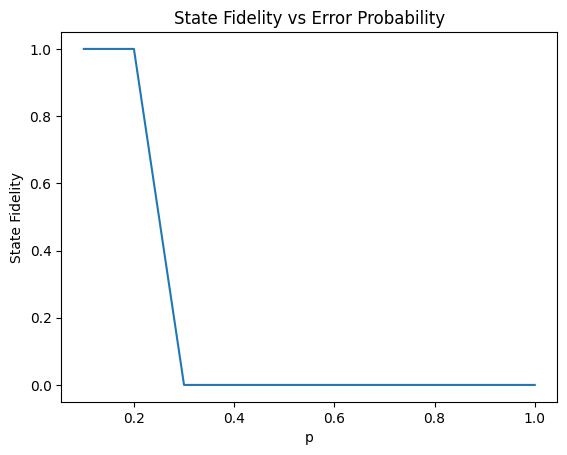

In [191]:
#let's plot state_fidelity vs probability

p_values = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70,0.80,0.90,1]

state_fidelities = []

for probability in p_values:

  full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

  initial_state = Statevector.from_instruction(full_code)
  initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

  full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
  full_code.barrier()


#==========
# ERRORS
#==========

  for i in range(9):
    if random() < probability:
      full_code.x(i)
    if random() < probability:
      full_code.z(i)
    full_code.barrier()

#==========================
# DETECTION AND CORRECTION
#==========================

  full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
  final_state = Statevector.from_instruction(full_code)
  final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
  state_fidel = state_fidelity(initial_state, final_state)

  state_fidelities.append(state_fidel)

# Plot the results
plt.plot(p_values, state_fidelities)
plt.xlabel('p')
plt.ylabel('State Fidelity')
plt.title('State Fidelity vs Error Probability')
plt.show()



### **Exercise #9**

Write a function that takes in a paramater, `probability`, and returns the fidelity before and after running the Shor code with errors that occur with the given probability.


**Hint**. This will look very similar to Exercise #8.

In [194]:
def get_fidelity(probability):

  full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

  initial_state = Statevector.from_instruction(full_code)
  initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

  full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
  full_code.barrier()


#==========
# ERRORS
#==========

  for i in range(9):
    if random() < probability:
      full_code.x(i)
    if random() < probability:
      full_code.z(i)
    full_code.barrier()

#==========================
# DETECTION AND CORRECTION
#==========================

  full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
  final_state = Statevector.from_instruction(full_code)
  final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
  return state_fidelity(initial_state, final_state)

  

### **Exercise #10**

The code provided below graphs the *average* state fidelity using the Shor code with increasing probability of errors. You will use this to answer several final questions in your project summary.

**NOTE**: Be patient! This may take up to a minute to run since it is simulating many quantum circuits (technically `num_points` * `num_trials_per_point` circuits).

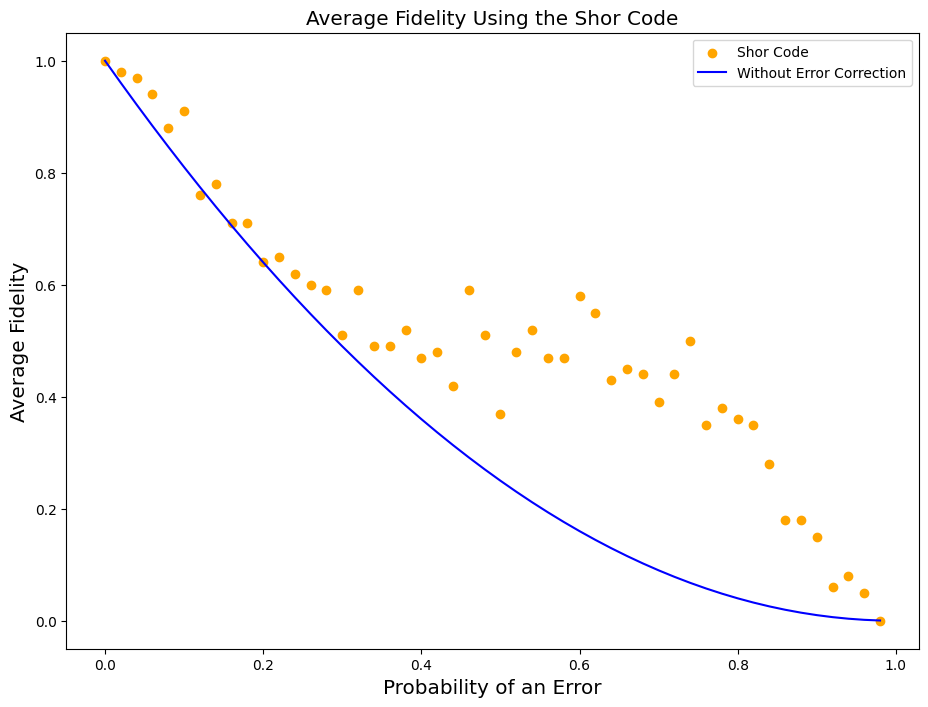

In [195]:
num_points = 50
num_trials_per_point = 100
average_fidelities_shor = []
probabilities = [p / num_points for p in range(num_points)]

for probability in probabilities:

  average_fidelity = 0
  for trial in range(num_trials_per_point):
    average_fidelity += get_fidelity(probability)

  average_fidelity /= num_trials_per_point
  
  average_fidelities_shor  += [average_fidelity]



plt.figure(figsize = (11, 8))
plt.scatter(probabilities, average_fidelities_shor, label = 'Shor Code', color = 'orange')
plt.plot(probabilities, [(1 - p)**2 for p in probabilities], label = 'Without Error Correction', color = 'blue')


plt.title("Average Fidelity Using the Shor Code", fontsize = 'x-large')
plt.xlabel("Probability of an Error", fontsize = 'x-large')
plt.ylabel("Average Fidelity", fontsize = 'x-large')
plt.legend()
plt.show()

## **Summary**:
Introduced by Peter Shor in 1995, the Shor's quantum error-correcting code is a quantum error-correcting technique/code that is used to correct a general class of errors in quantum computers: bit-flip errors or phase-flip errors or both. While using bit-flip code, it created problem with the phase of the qubit. Also, while using the phase-flip code, it created problem with the bit of the qubit. In order to perform both of those corrections, the Shor's code can be used.

The key idea behind Shor's code is to encode a single logical qubit in a larger number of physical qubits, like we used 8 ancillary qubits and 1 logical qubit; 9 physical qubits are used to obtain 1 logical bit. The Shor's code is designed so that any single qubit error on the physical qubits can be corrected by measuring the syndrome of the error and then applying a correction operation to the physical qubits. In this code, unlike repeatition code, we do not use measurement (while correcting) -- which gives an advantage of not losing the quantum information from the qubit state while doing measurement (called decoherance). This makes the Shor's error-correcting code powerful tool in quantum computers, which are highly prone to a wide range of errors due to the fragile qubit (quantum states are highly prone to decoherance).



## **Wrapping Up**

*Congratulations!* You have implemented and analyzed the Shor code in qiskit -- no small feat. To wrap up, please make sure to write a summary of the concepts covered here, including answers to the following questions:

1. How does using the Shor code compare to using no error correction? Are there any trends you notice?
**Answer**: The above graph is evident that using the Shor's code improves the average fidelity of the quantum system when errors are present (especially after ~30% error). The Shor's code is effective to use (as it improves the fidelity). The Shor's code seems to perform very well in the error range ~50% to ~85% (probability of an Error).

1. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?
**Answer**: When using the Shor code, the average fidelity decreases (<1, >0) \[kind of exponential decay ~e^(-x/4)] with increasing probability of errors because. This is becauee the Shor code encode logical qubits (we used 1 logical qubit) into multiple physical qubits (we used 8 ancilla), which are then used to detect and correct errors. The encoding process causes redundancy into the quantum state, which allows errors to be detected and corrected. In our examples, we encoded a single logical qubit into 3 physical qubits using the Shor code, then a single bit-flip error on any of the three physical qubits can cause an error in the logical qubit. However, the probability of a bit-flip error occurring on any of the three physical qubits is higher than the probability of a bit-flip error occurring on the logical qubit alone. This is because the probability of an error on any of the three physical qubits is the sum of the probabilities of a bit-flip error on each individual physical qubit. Therefore, the average error rate of the system is higher than the actual error rate. This reduces the average fidelity of the system as the probability of errors increases.

1. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?
**Answer**: From the graph, it's seen that the average fidelity decays somewhat like an exponential function: this could be because higher chance of error in the used qubits makes the quantum sytem highly prone to undergo other errors (like explained in the previous question) thereby making final states less closer to the initial states: the fidelity goes down.

# End of Lab

---

© 2023 The Coding School, All rights reserved